# Deep Learning for Image Classification


Label	Description

- 0	    T-shirt/top
- 1	    Trouser
- 2	    Pullover
- 3	    Dress
- 4	    Coat
- 5	    Sandal
- 6	    Shirt
- 7	    Sneaker
- 8	    Bag
- 9	    Ankle boot

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# dataset fashion mnist

from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_train[0].shape

(28, 28)

## Visual Image

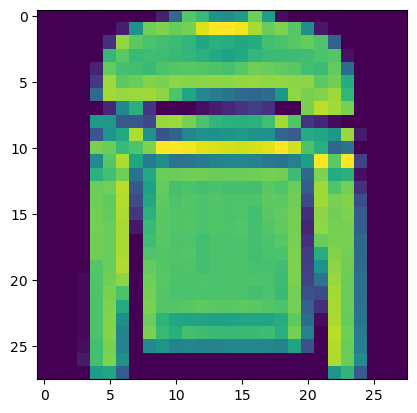

In [5]:
plt.imshow(x_train[5]);

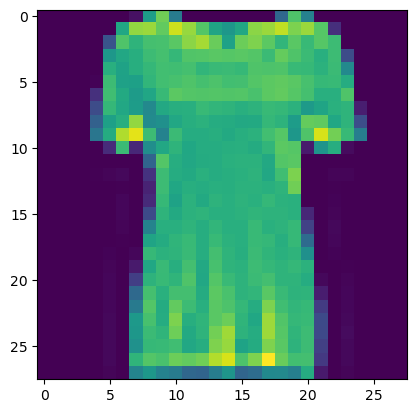

In [6]:
plt.imshow(x_train[10])

## Preprocessing data Y

In [7]:
y_train.shape

(60000,)

In [8]:
from tensorflow.keras.utils import to_categorical

In [9]:
y_sample = to_categorical(y_train)

In [10]:
y_sample.shape

(60000, 10)

In [11]:
y_cat_train = to_categorical(y_train, num_classes = 10)

In [12]:
y_cat_test = to_categorical(y_test, num_classes = 10)

## Preprocessing data X

In [13]:
x_train[0].shape

(28, 28)

In [14]:
x_train[0].max()

255

In [15]:
x_train = x_train/255

In [16]:
x_test = x_test/255

In [17]:
x_train.shape

(60000, 28, 28)

In [18]:
x_test.shape

(10000, 28, 28)

In [19]:
x_train.ndim

3

## Reshape data X

In [20]:
x_train = x_train.reshape(60000, 28, 28,1)

In [21]:
x_test= x_test.reshape(10000, 28, 28, 1)

In [22]:
x_train.shape

(60000, 28, 28, 1)

In [23]:
x_test.shape

(10000, 28, 28, 1)

In [24]:
x_train.ndim

4

## Create Model

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (4,4), input_shape= (28, 28, 1), activation='relu'))
model.add(MaxPool2D(pool_size= (2,2)))
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
              optimizer ='adam', 
              metrics = ['accuracy'])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 64)                294976    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                        

In [28]:
# earlystopping
early_stop = EarlyStopping(monitor= 'val_loss', patience= 2)

## Train The Model

In [29]:
model.fit(x_train, y_cat_train, 
          epochs = 10, 
          validation_data = (x_test, y_cat_test), 
          callbacks = [early_stop])

Epoch 1/10
1875/1875 [==============================] - 54s 24ms/step - loss: 0.4605 - accuracy: 0.8367 - val_loss: 0.3500 - val_accuracy: 0.8725
Epoch 2/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.3156 - accuracy: 0.8867 - val_loss: 0.2908 - val_accuracy: 0.8938
Epoch 3/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.2747 - accuracy: 0.9011 - val_loss: 0.2785 - val_accuracy: 0.8955
Epoch 4/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.2469 - accuracy: 0.9090 - val_loss: 0.2665 - val_accuracy: 0.9033
Epoch 5/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.2237 - accuracy: 0.9158 - val_loss: 0.2668 - val_accuracy: 0.9023
Epoch 6/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.2046 - accuracy: 0.9233 - val_loss: 0.2608 - val_accuracy: 0.9084
Epoch 7/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.1893 - accuracy: 0.9302 - val_loss: 0.2650 -

In [30]:
losses = pd.DataFrame(model.history.history)

In [31]:
losses

,loss,accuracy,val_loss,val_accuracy
0,0.460452,0.836667,0.350025,0.8725
1,0.315634,0.886750,0.290830,0.8938
2,0.274658,0.901150,0.278464,0.8955
3,0.246867,0.908983,0.266492,0.9033
4,0.223688,0.915833,0.266813,0.9023
5,0.204601,0.923283,0.260802,0.9084
6,0.189317,0.930233,0.264988,0.9090
7,0.174592,0.934967,0.266294,0.9086


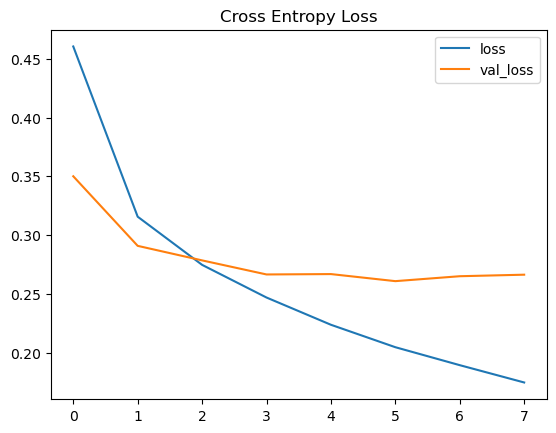

In [32]:
losses[['loss','val_loss']].plot()
plt.title('Cross Entropy Loss');

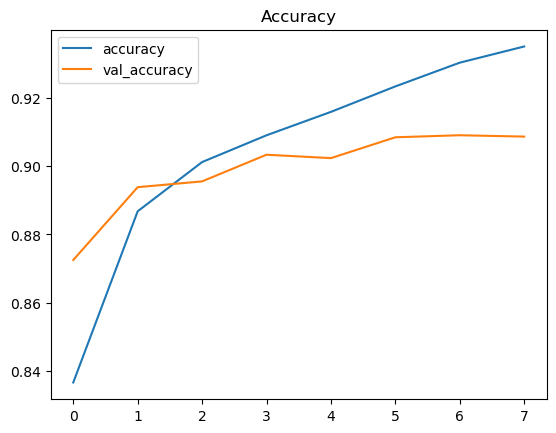

In [33]:
losses[['accuracy','val_accuracy']].plot()
plt.title('Accuracy');

In [34]:
model.evaluate(x_test, y_cat_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.2663 - accuracy: 0.9086


[0.26629438996315, 0.9085999727249146]

##  Prediction

In [35]:
prediction = np.argmax(model.predict(x_test), axis =-1)

313/313 [==============================] - 3s 9ms/step


In [36]:
y_cat_test.shape

(10000, 10)

In [37]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [38]:
prediction[0]

9

## Evaluation Model

In [39]:
from sklearn.metrics import classification_report, confusion_matrix

In [40]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1000
           1       1.00      0.97      0.98      1000
           2       0.84      0.88      0.86      1000
           3       0.91      0.92      0.91      1000
           4       0.82      0.89      0.85      1000
           5       0.97      0.99      0.98      1000
           6       0.77      0.69      0.73      1000
           7       0.96      0.96      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [41]:
confusion_matrix(y_test, prediction)

array([[849,   1,  24,  23,   5,   1,  91,   0,   6,   0],
       [  2, 971,   0,  15,   4,   0,   6,   0,   2,   0],
       [ 14,   0, 876,   6,  63,   0,  41,   0,   0,   0],
       [  6,   2,  14, 915,  25,   0,  36,   0,   2,   0],
       [  1,   1,  59,  24, 887,   0,  28,   0,   0,   0],
       [  0,   0,   0,   0,   0, 989,   0,   6,   0,   5],
       [112,   0,  73,  24,  91,   0, 690,   0,  10,   0],
       [  0,   0,   0,   0,   0,  19,   0, 965,   0,  16],
       [  3,   0,   3,   2,   5,   2,   0,   2, 983,   0],
       [  0,   0,   0,   0,   0,   8,   1,  30,   0, 961]], dtype=int64)

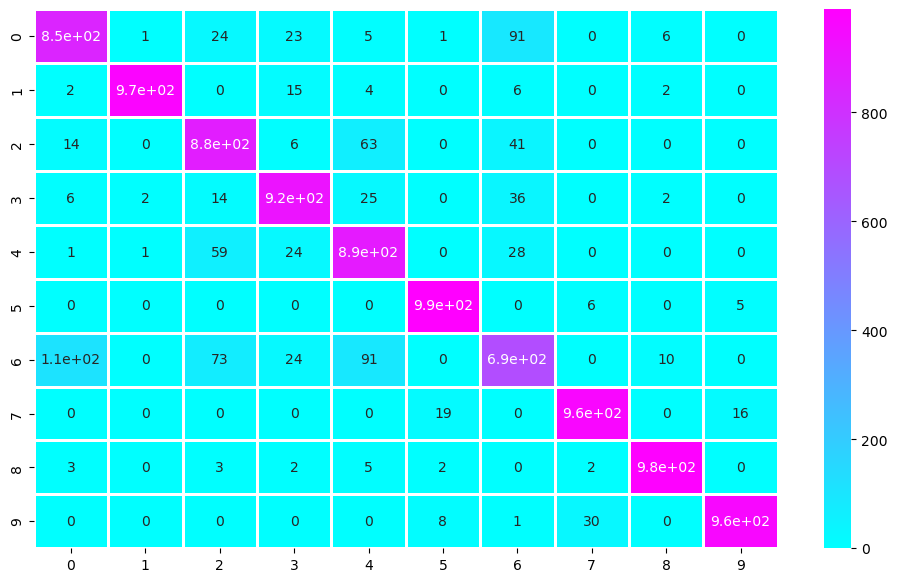

In [42]:
plt.figure(figsize=(12, 7))
sns.heatmap(confusion_matrix(y_test, prediction), lw=1, annot=True, cmap='cool');

## New data

In [43]:
my_fashion = x_test[0]

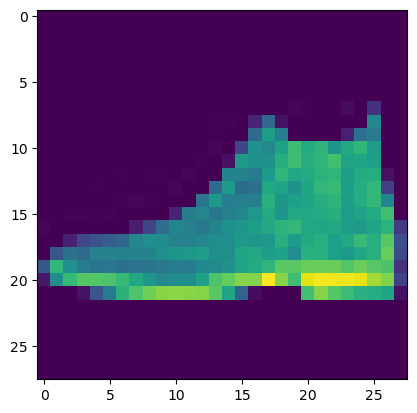

In [44]:
plt.imshow(my_fashion)

In [47]:
new_predict = np.argmax(model.predict(my_fashion.reshape(1, 28,28,1)), axis=-1)

1/1 [==============================] - 0s 52ms/step


In [48]:
new_predict

array([9], dtype=int64)